# 图像乘法运算

In [2]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame

In [3]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
src2 = cv2.cvtColor(cv2.imread('../datas/f1.jpg'),cv2.COLOR_BGR2RGB)

In [52]:
def togray(src):
    rgb = np.float64(src)
    dst = 0.299 * rgb[:,:,0] + 0.587 * rgb[:,:,1] + 0.114 * rgb[:,:,2]
    return cv2.convertScaleAbs(dst)

def tobinary(gray,thresh):
    dst = np.zeros_like(gray)
    idx = (gray >= thresh)
    dst[idx] = 1
    return dst

def multiplication(src1,src2):
    if len(src2.shape) > 2:
        raise ValueError('src2 must be a binary image')
    if len(src1.shape) > 2:
        s1 = np.array(src1.shape[:2])
        s2 = np.array(src2.shape)
        res = (s1 == s2).all()
        if not res:
            raise ValueError('sr1 sr2 width height should be equal')
#     mask = np.zeros_like(src2)
#     mask[src2 >= 1] = src2[src2 >= 1]
    if len(src1.shape) == 2:
        dst = np.float64(src1) * np.float64(src2)
        dst[dst > 255] = 255
    else:
        dsts = []
        channel = src1.shape[-1]
        for i in range(channel):
            c = np.zeros((src2.shape),dtype=np.float64)
            c = np.float64(src1[:,:,i]) * np.float64(src2)
            dsts.append(c)
        dst = cv2.merge(dsts)
        dst[dst > 255] = 255
    return cv2.convertScaleAbs(dst)

In [53]:
gray = togray(src)
binary = tobinary(gray,160)
dst = multiplication(src,binary)

Text(0.5,1,'Multiplication')

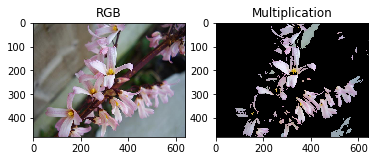

In [54]:
plt.subplot(121)
plt.imshow(src)
plt.title('RGB')
plt.subplot(122)
plt.imshow(dst)
plt.title('Multiplication')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/44978011